# 1. Introduction
A bike sharing system is a service which bikes made available for the shared use to individuals on a short term basis. For a price or free.
US bike sharing provider Boom Bikes has recently suffered considerable dips in their revenue due to Corona Pandemic. 
Plan to accelerate revenue once ongoing lockdown ends and economy restores to healthy state.

They planned to prepare themselves to cater to the people needs once the situations gets better all around and stand out from other service providers and make huge profits


# 2. Business Goal
- Model the demand for the shared bikes with available independent variables
- It will be used by management how exactly the demand variables with different features
- So business strategy to meet the demand levels and meet customers expectations
- The model will be a good way for management to understand demand dynamics of a new market

They want to understand the factors affecting the demand for these shared bikes in the American market
Company wants to know 
1. Which variables are significant in predicting the demand for shared bikes
2. How well those variables describe the bike demand



# 3. Reading, Understanding Data and EDA

### 3.1 Setup Python modules and Basic understanding of data

In [5]:
#import data understanding and EDA modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
#import stats and sklearn for Linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

#### Module Versions
```
matplotlib                3.9.2           py312h06a4308_0  
matplotlib-base           3.9.2           py312h66fe004_0  
matplotlib-inline         0.1.6           py312h06a4308_0  
numpy                     1.26.4          py312hc5e2394_0  
numpy-base                1.26.4          py312h0da6c21_0  
numpydoc                  1.7.0           py312h06a4308_0  
pandas                    2.2.2           py312h526ad5a_0  
plotly                    5.24.1          py312he106c6f_0  
scikit-learn              1.5.1           py312h526ad5a_0  
scipy                     1.13.1          py312hc5e2394_0  
seaborn                   0.13.2          py312h06a4308_0  
statsmodels               0.14.2          py312ha883a20_0  
```


In [8]:
bs = pd.read_csv("day.csv")

In [9]:
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
bs.shape

# 730 rows and 16 columns

(730, 16)

### 3.2 Data Cleaning

#### 3.2.1 Check for Missing Values

In [13]:
bs.info()
#No Null values or missing values
#But might need to change the dteday to datetime col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### 3.2.2 Drop Unwanted Columns

- Drop the unnecessary columns: casual and registered, which already which captured by target column cnt
- Drop the unwanted column: instant, this is column used for row indentification, no use for linear regression
- Drop the dteday after post EDA, as this will not be more useful since mnth and yr columns are already present

In [16]:

bs_clean = bs.drop(['instant', 'casual','registered'], axis=1)

#### 3.2.3 Check for uniqueness and drop duplicates

In [18]:
#Check if there any duplicate rows
bs_clean.duplicated(keep=False).any()

#No Duplicates were identified

False

In [19]:
bs_clean.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [20]:
# Verify the data values and uniques are correct
bs_clean.nunique()

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

**date** There are 730 day entries
- There are 2 years 2018 and 2019 as described in the data dict
  
**month** 12 is correct
- **Need to map** the respective months to category
  
**holiday** 2 is correct it will be 0 or 1

**weekday** 7 is correct 
- **Need to map** the data to weekdays
  
**weathersit** 3 Verify if the data is correct since there are only 3 unique values identified instead of 4
- **Need to map** the data to the respective weather category
  
**season**: 4 is correct. There are 4 Seasons as described in the data dict (1:spring, 2:summer, 3:fall, 4:winter)
- **Need to map** the four seasons as they should be avoided to be numerically represented and of any order



In [22]:
# Verify the values are fine, weathersit value 4 is not used in the data anytime
bs_clean.weathersit.value_counts()
# Data looks fine since there is no Heavy rainfall accounted for in the data yet

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

#### 3.2.4 Rename and Map the category columns for EDA 

In [24]:
#Map the months
# Rename the column for readability
bs_clean = bs_clean.rename(columns={"dteday": "date", "mnth": "month", "yr": "year", "hum": "humidity", 
                 "atemp": "feels_temp", "weathersit": "weather"})

In [25]:
bs_clean.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,feels_temp,humidity,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
#Map the months
bs_clean.month = bs_clean.month.map({1:'jan', 2:'feb', 3:'mar', 4:'apr',
                    5:'may', 6:'june', 7:'july', 8:'aug',
                    9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [27]:
#Map the weekday
bs_clean.weekday = bs_clean.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [28]:
#Map the season
# 	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
bs_clean.season = bs_clean.season.map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

In [29]:
#Map the year
bs_clean.year = bs_clean.year.map({0: 2018, 1: 2019})

In [30]:
#Map the weather
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

bs_clean.weather = bs_clean.weather.map({1: "very good", 2: "good", 3: "bad", 4: "very bad"})

In [31]:
bs_clean.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,feels_temp,humidity,windspeed,cnt
0,01-01-2018,spring,2018,jan,0,sat,0,good,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,jan,0,sun,0,good,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,jan,0,mon,1,very good,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,jan,0,tue,1,very good,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,jan,0,wed,1,very good,9.305237,11.46350,43.6957,12.522300,1600


### 3.3 EDA Analysis

##### 3.3.1 Check for Outliers

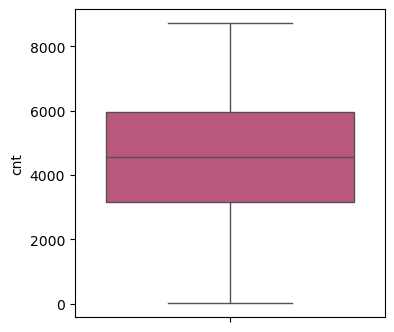

In [34]:
plt.figure(figsize=(4,4))
sns.boxplot(bs_clean['cnt'], palette="plasma_r")
plt.show()

#No outliers found

#### 3.3.2 Univariate Analysis

Summary Statistics for 'cnt':
count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64


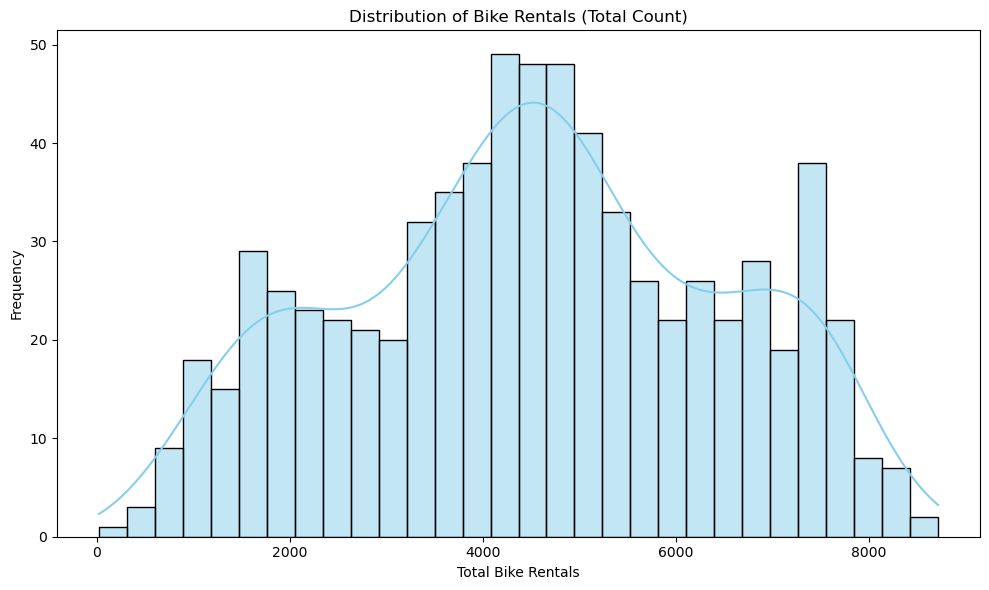

In [36]:
cnt_stats = bs_clean['cnt'].describe()
print("Summary Statistics for 'cnt':")
print(cnt_stats)

# Visualize the distribution of bike rentals (cnt)
plt.figure(figsize=(10,6))
sns.histplot(bs_clean['cnt'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Bike Rentals (Total Count)')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Most days, we see rentals in the 2000-7000 range.
#Bikes getting highly rented per day on a range of 4000-5500
#- This shows there is a good demand for bike rental
#- Less than 2000 is a very low number of records which confirms that demand is good

In [37]:
bs_clean.columns

Index(['date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'feels_temp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 [Text(-100.0, 0, '23-09-2019'),
  Text(0.0, 0, '01-01-2018'),
  Text(100.0, 0, '11-04-2018'),
  Text(200.0, 0, '20-07-2018'),
  Text(300.0, 0, '28-10-2018'),
  Text(400.0, 0, '05-02-2019'),
  Text(500.0, 0, '16-05-2019'),
  Text(600.0, 0, '24-08-2019'),
  Text(700.0, 0, '02-12-2019'),
  Text(800.0, 0, '')])

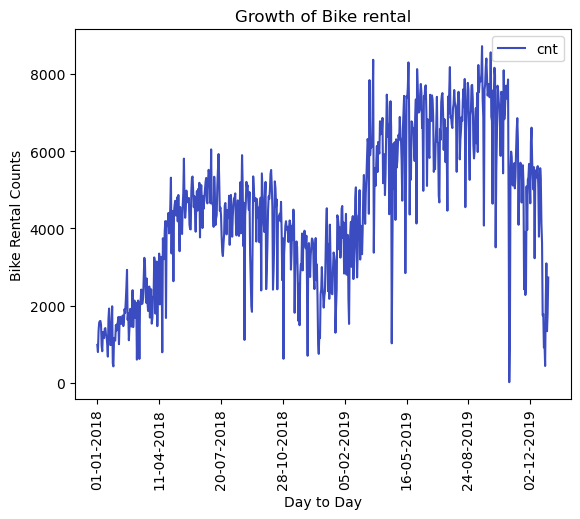

In [38]:
#
bs_clean.plot.line(x='date',y='cnt', colormap="coolwarm")
plt.title("Growth of Bike rental")
plt.xlabel("Day to Day")
plt.ylabel("Bike Rental Counts")
plt.xticks(rotation=90)

#There is growth for the company from 2018 to 2019
#There is a similar pattern of drop in demand between the years
#i.e increase in demand raised during mid of the year
#There is a significant drop in demand during the end of the year 2019 - could be due to Covid
#There are a few downward spikes that could be seen dropping close to zero demand

##### 3.3.2.1 Grouped Univariate Analysis

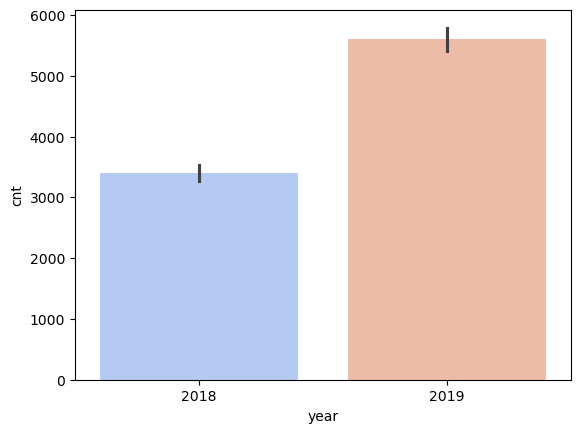

In [40]:
sns.barplot(x="year", y="cnt", data=bs_clean, palette="coolwarm")
# plt.legend(labels=["2018","2019"])
plt.show()

# Demand has increased significantly from 2018 to 2019

In [41]:
def col_and_year(col):
    plt.figure(figsize=(12,12))
    plt.subplot(2,2,1)
    sns.barplot(x=col, y="cnt", data=bs_clean, palette="Spectral")
    plt.subplot(2,2,2)
    sns.barplot(x=col, y="cnt", data=bs_clean, hue="year", palette="coolwarm")
    plt.legend(labels=["2018","2019"])
    plt.subplot(2,2,3)
    sns.boxplot(x=col, y="cnt", data=bs_clean, palette="Spectral")
    plt.subplot(2,2,4)
    sns.boxplot(x=col, y="cnt", data=bs_clean, hue="year", palette="coolwarm")
    # plt.legend(labels=["2018","2019"])
    plt.show()

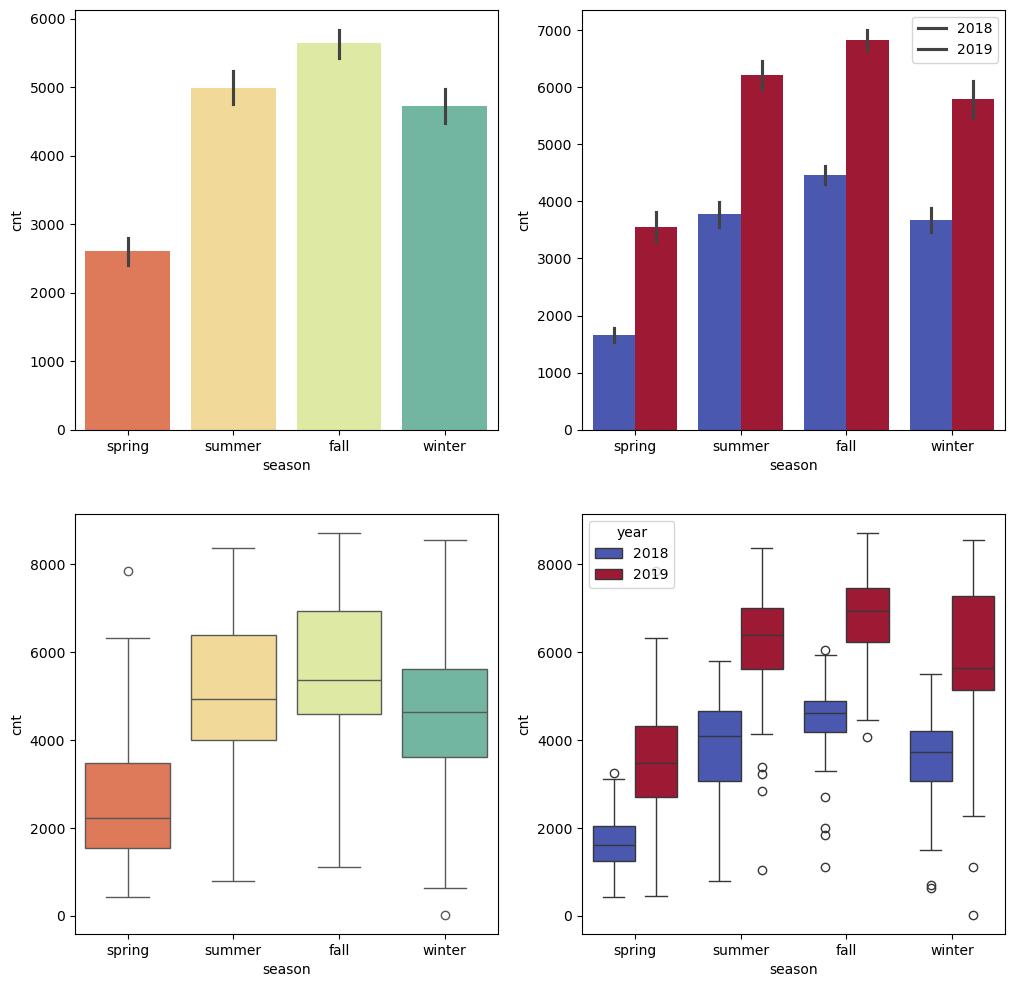

In [42]:
# Season and year wise season analysis
col_and_year("season")

# Season of Fall has highest bike rental demands for 2018 and 2019
# Season of Summer and Winter have moderate and equal bike rental demands for 2018 and 2019

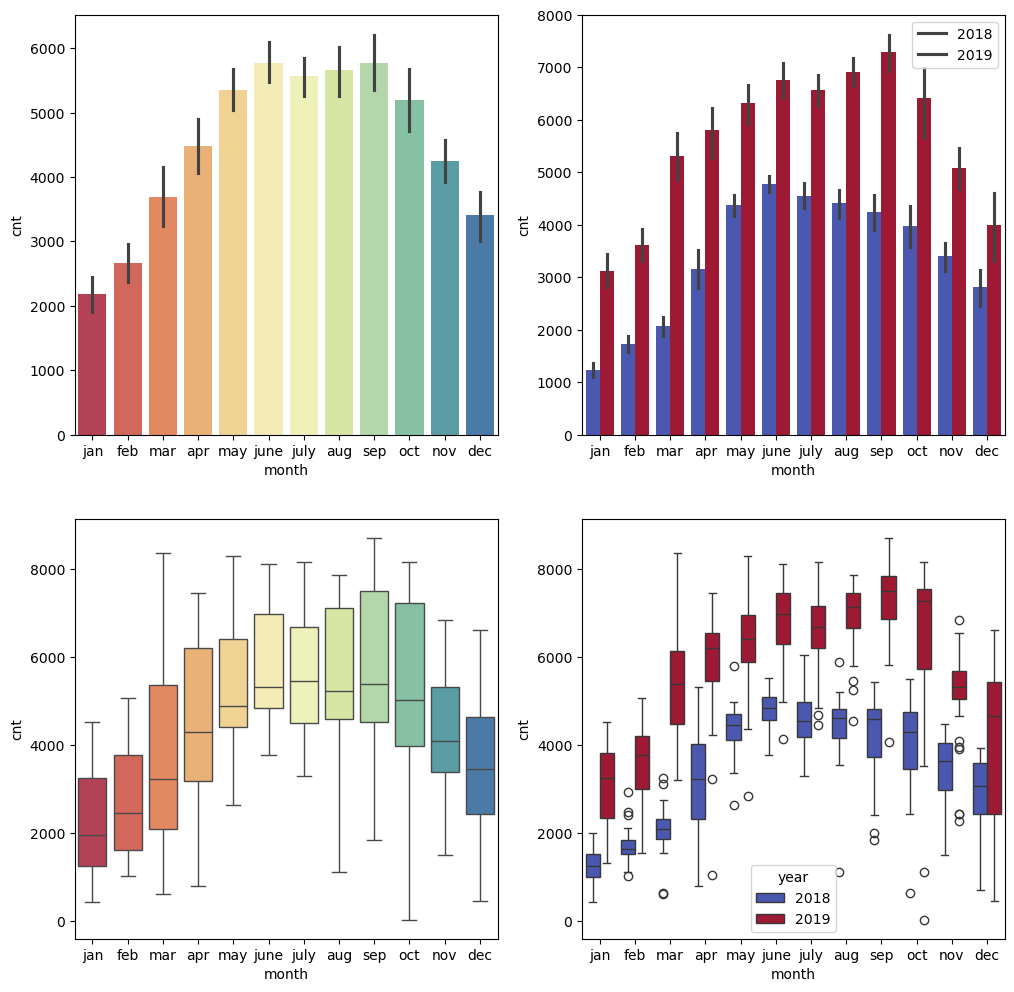

In [43]:
col_and_year("month")

# From May to Oct Demands have increased compared to other months
# The pattern is common for both 2018 and 2019 year
# September has the highest demand followed by June


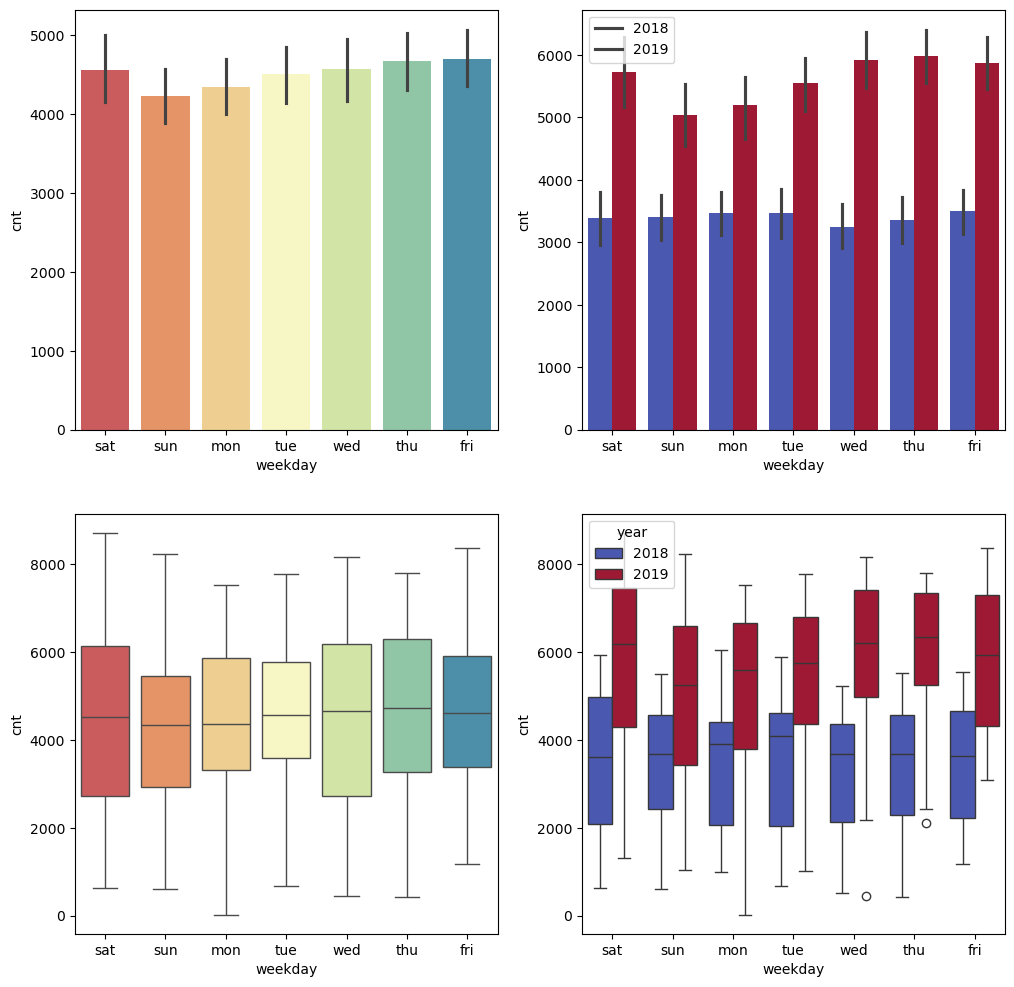

In [44]:
col_and_year("weekday")

# In General considering both years from Wednesday to Saturday the demand increases gradually
# 2019 Thursday have higher demand followed by Wednesday, Saturday and Friday
# 2018 dont have signifiant changes for the bike rental demands during specific week days
# Saturday demand had gone up and Sun demand has gone down relative to other weekdays

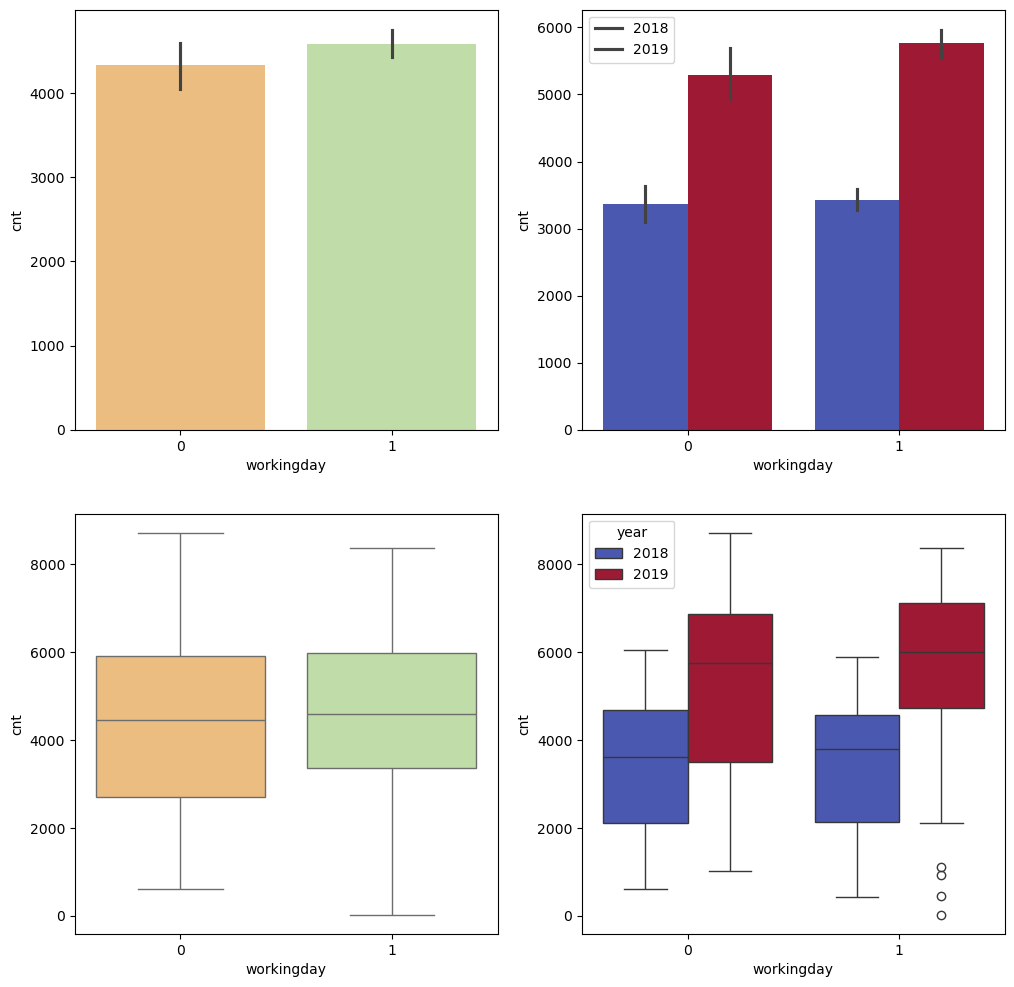

In [45]:
col_and_year("workingday")

# Working days has the highest demand but not very significant increase in demands

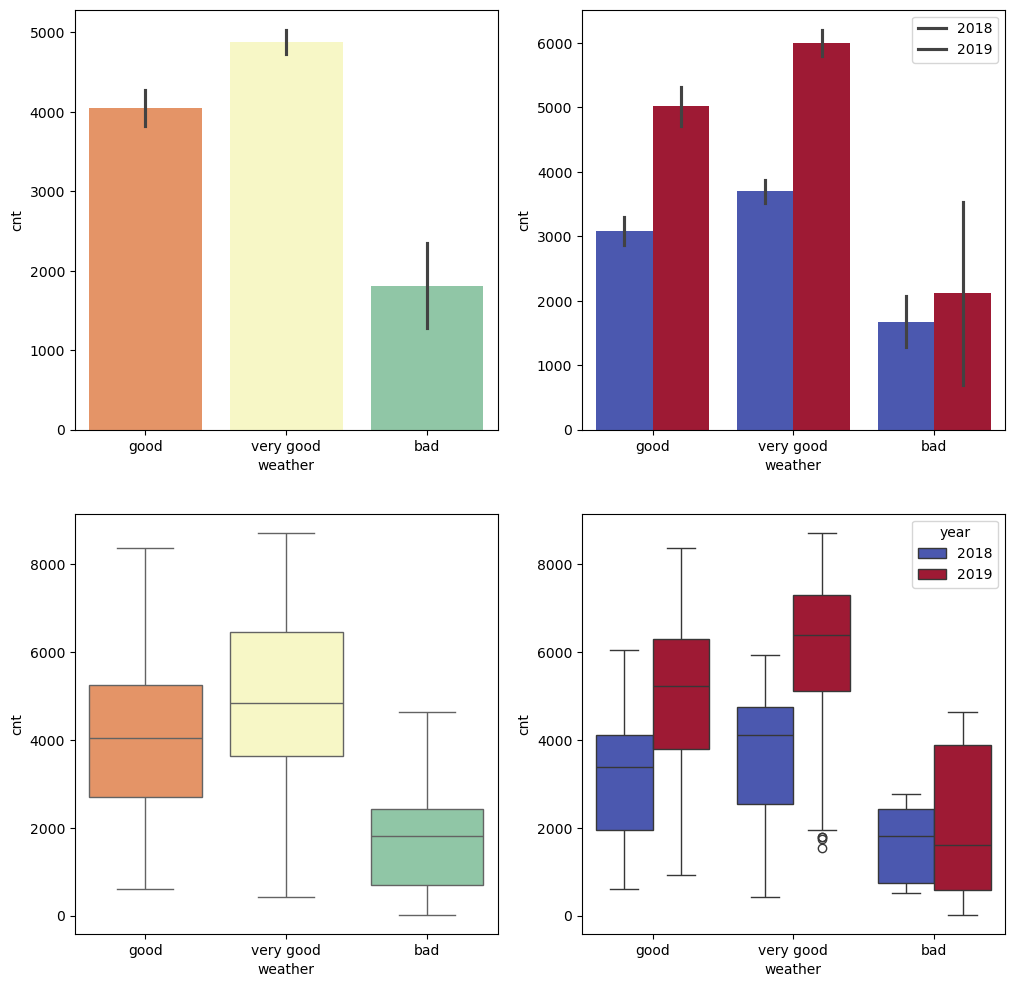

In [46]:
col_and_year('weather')

# It is clear that "Bad" weather significantly reduced the demand

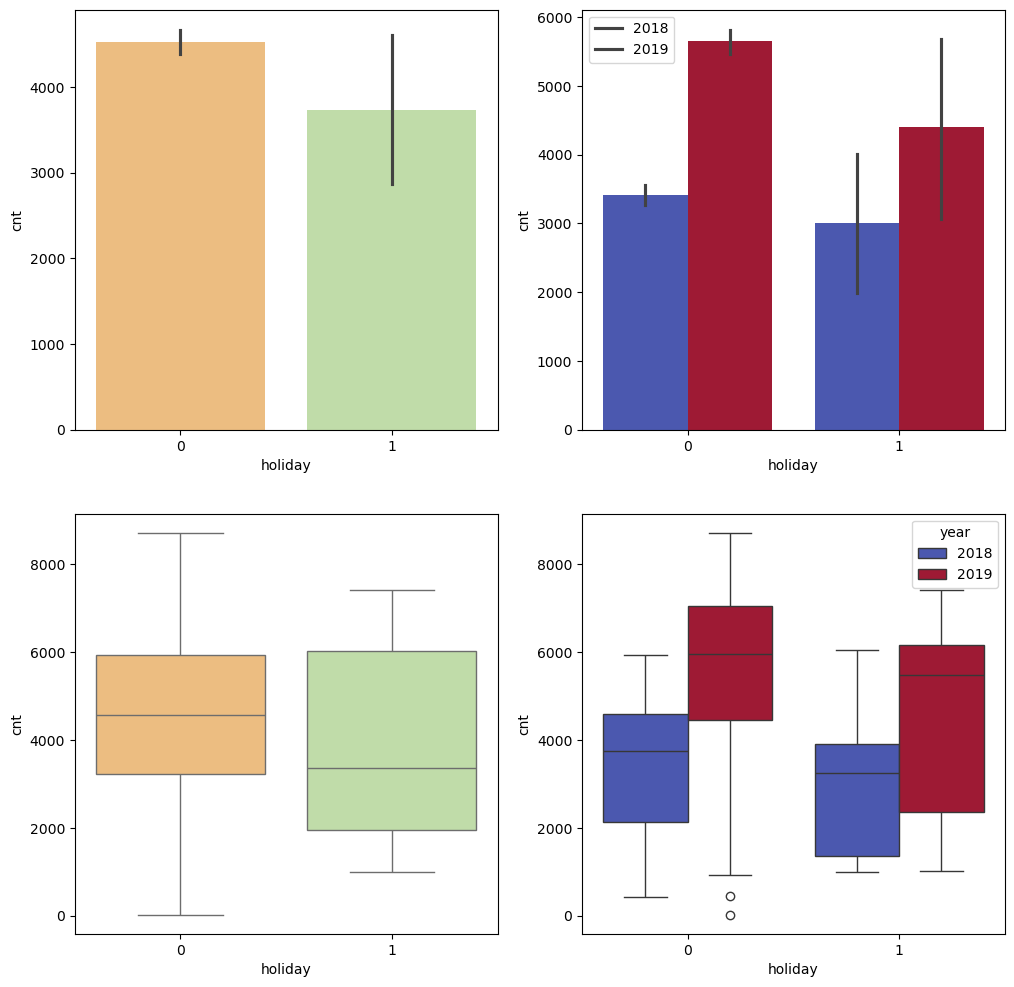

In [47]:
col_and_year('holiday')

# During Holidays demand has significantly reduced

#### 3.3.3 Bivariate Analysis

In [49]:
bs_clean.columns

Index(['date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'feels_temp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

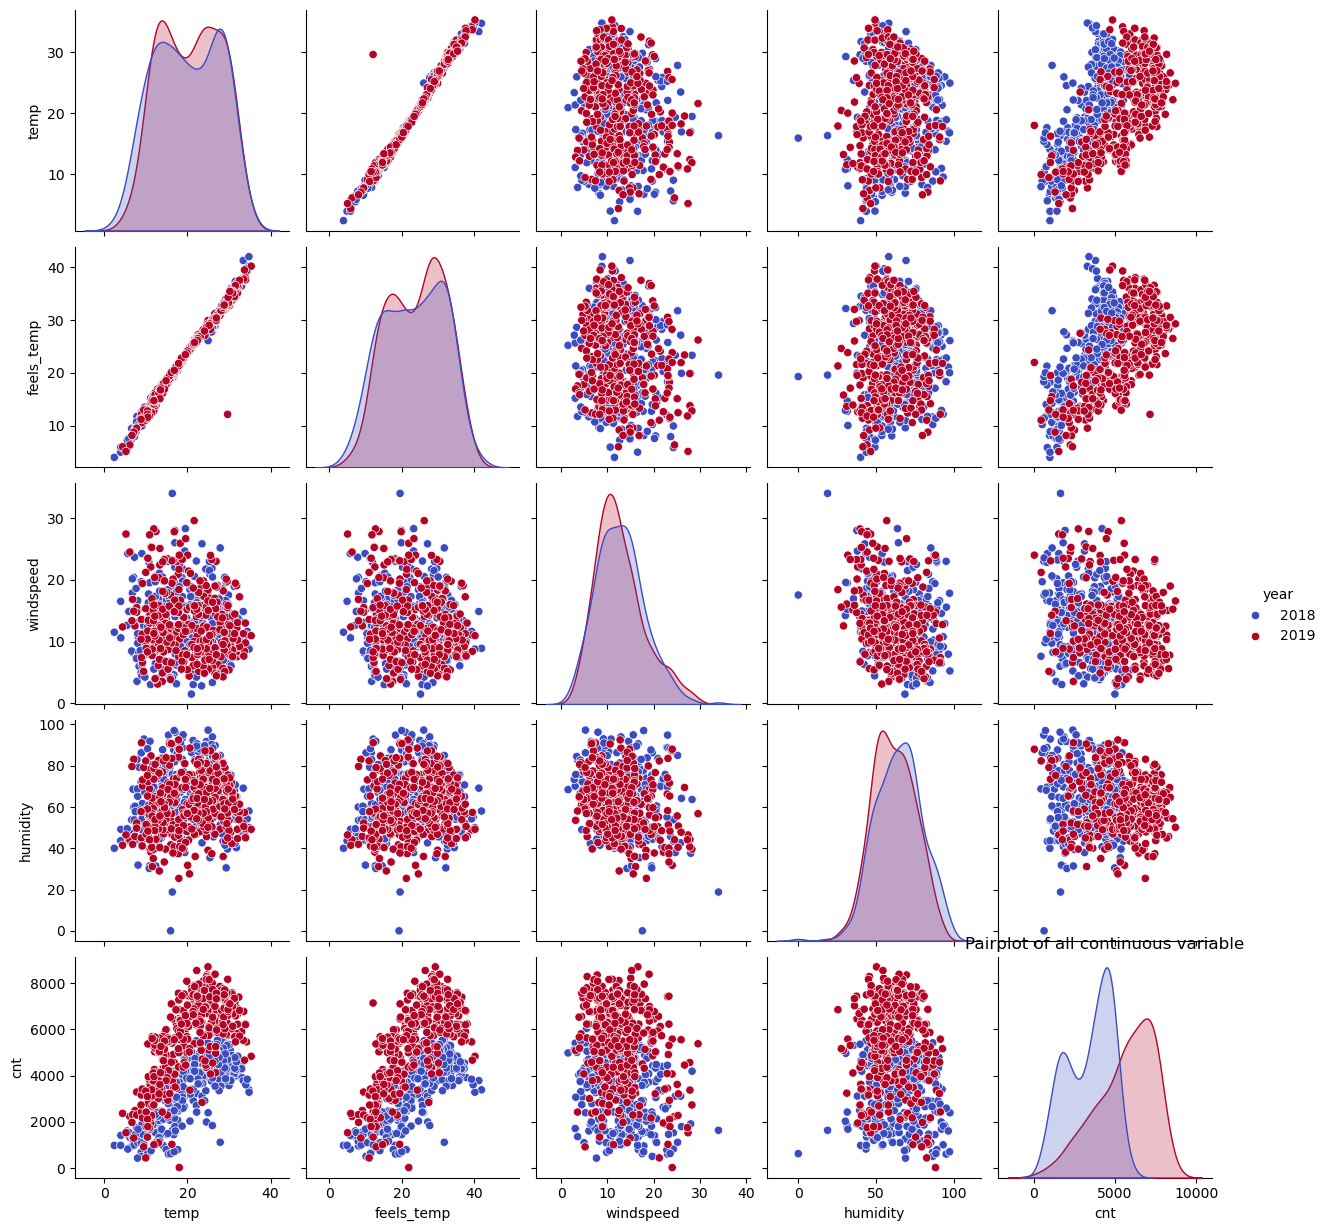

In [50]:
# plt.figure(figsize=(20,20))
sns.pairplot(data=bs_clean,
             vars=["temp", "feels_temp", "windspeed", "humidity", "cnt"], 
             hue="year", diag_kind="kde", palette='coolwarm')
plt.title("Pairplot of all continuous variable")
plt.show()

# The correlation between the temp and feels_temp is an obvious but not important factor for business
# The correlation between the temp and feels_temp is redundant while accounting for the cnt
# temp, which impacts the demand for bike rentals. So, the higher the temperature, the higher the demands
# We also see the count increased and right skewed towards higher demands per day from 2018 to 2019 (kde)

#### 3.3.4 Mulivariate Analysis

In [52]:
bs_corr = bs_clean[["temp", "feels_temp", "windspeed", "humidity", "cnt"]].corr()

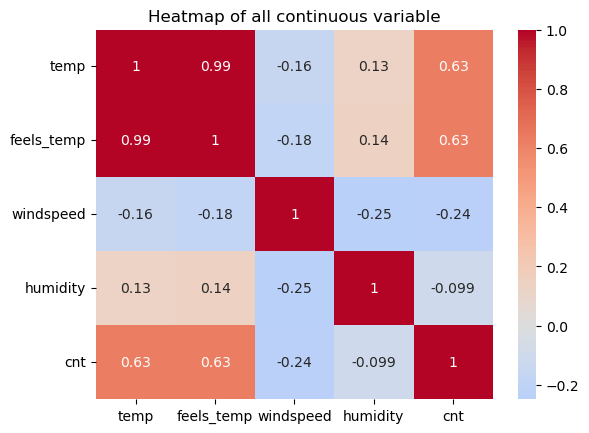

In [53]:
sns.heatmap(bs_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap of all continuous variable")
plt.show()

# Variables other than temp and feels_temp are not having any significance on the cnt
#But temp and feels_temp are redundant variables

### 4. Data Preparation for linear Regression model

In [55]:
# Super
# Target variable cnt is available
# Target variable is continuous

bs_ln_clean = bs_clean.copy()

In [56]:
# Remove the date column for Linear regression
bs_ln_clean.drop("date", axis=1, inplace=True)

# Map back the year to 0 and 1
bs_ln_clean.year = bs_ln_clean.year.map({2018: 0, 2019: 1})

In [57]:
bs_ln_clean.head()

,season,year,month,holiday,weekday,workingday,weather,temp,feels_temp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,good,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,good,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,very good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,very good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,very good,9.305237,11.46350,43.6957,12.522300,1600


#### 4.1 Create dummy variables

Following are the categories greater than 2
- season
- month
- weekday
- weather

In [59]:
dummy_columns=['season', 'month', 'weekday']
bs_ln = pd.get_dummies(bs_ln_clean, columns=dummy_columns, dtype=int, drop_first=True)

In [60]:
bs_ln.columns

Index(['year', 'holiday', 'workingday', 'weather', 'temp', 'feels_temp',
       'humidity', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_july', 'month_june', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [61]:
# Since weather already one category value is not available, do not drop the first column
bs_ln = pd.get_dummies(bs_ln, columns=['weather'], dtype=int)

In [62]:
bs_ln.columns

Index(['year', 'holiday', 'workingday', 'temp', 'feels_temp', 'humidity',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weather_bad', 'weather_good',
       'weather_very good'],
      dtype='object')

In [63]:
bs_ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   feels_temp         730 non-null    float64
 5   humidity           730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   season_spring      730 non-null    int64  
 9   season_summer      730 non-null    int64  
 10  season_winter      730 non-null    int64  
 11  month_aug          730 non-null    int64  
 12  month_dec          730 non-null    int64  
 13  month_feb          730 non-null    int64  
 14  month_jan          730 non-null    int64  
 15  month_july         730 non-null    int64  
 16  month_june         730 non

In [64]:
bs_ln.describe()

,year,holiday,workingday,temp,feels_temp,humidity,windspeed,cnt,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_bad,weather_good,weather_very good
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986,0.634247
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004,0.481971
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. Linear Regression Model building

#### 5.1 Split to Train and Test

In [67]:
#Spliting the train and test datasets
bs_train, bs_test = train_test_split(bs_ln, train_size=0.70, random_state=114)

In [68]:
print(bs_train.shape)
print(bs_test.shape)

(510, 31)
(220, 31)


In [69]:
# Numerifcal columns for scaling using MinMaxScaler
num_cols = ["temp", "feels_temp", "humidity", "windspeed", "cnt"]

#### 5.2 Scale the train data sets

In [71]:
# Transform the numerical values using MinMaxScaler
mmscaler = MinMaxScaler()
bs_train[num_cols] = mmscaler.fit_transform(bs_train[num_cols])

In [72]:
bs_train.head()

,year,holiday,workingday,temp,feels_temp,humidity,windspeed,cnt,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_bad,weather_good,weather_very good
13,0,0,1,0.126773,0.146318,0.553034,0.204826,0.160953,1,0,...,0,0,0,0,0,0,0,0,0,1
409,1,0,1,0.324018,0.341062,0.523136,0.241759,0.448688,1,0,...,0,0,0,0,0,1,0,0,1,0
161,0,0,0,0.829706,0.801508,0.673093,0.276267,0.568799,0,1,...,0,0,1,0,0,0,0,0,0,1
621,1,0,1,0.715485,0.689164,0.691517,0.147564,0.918891,0,0,...,1,0,0,0,0,0,0,0,0,1
432,1,0,1,0.438239,0.425549,0.418594,0.932444,0.523125,1,0,...,0,0,0,0,0,0,0,0,1,0


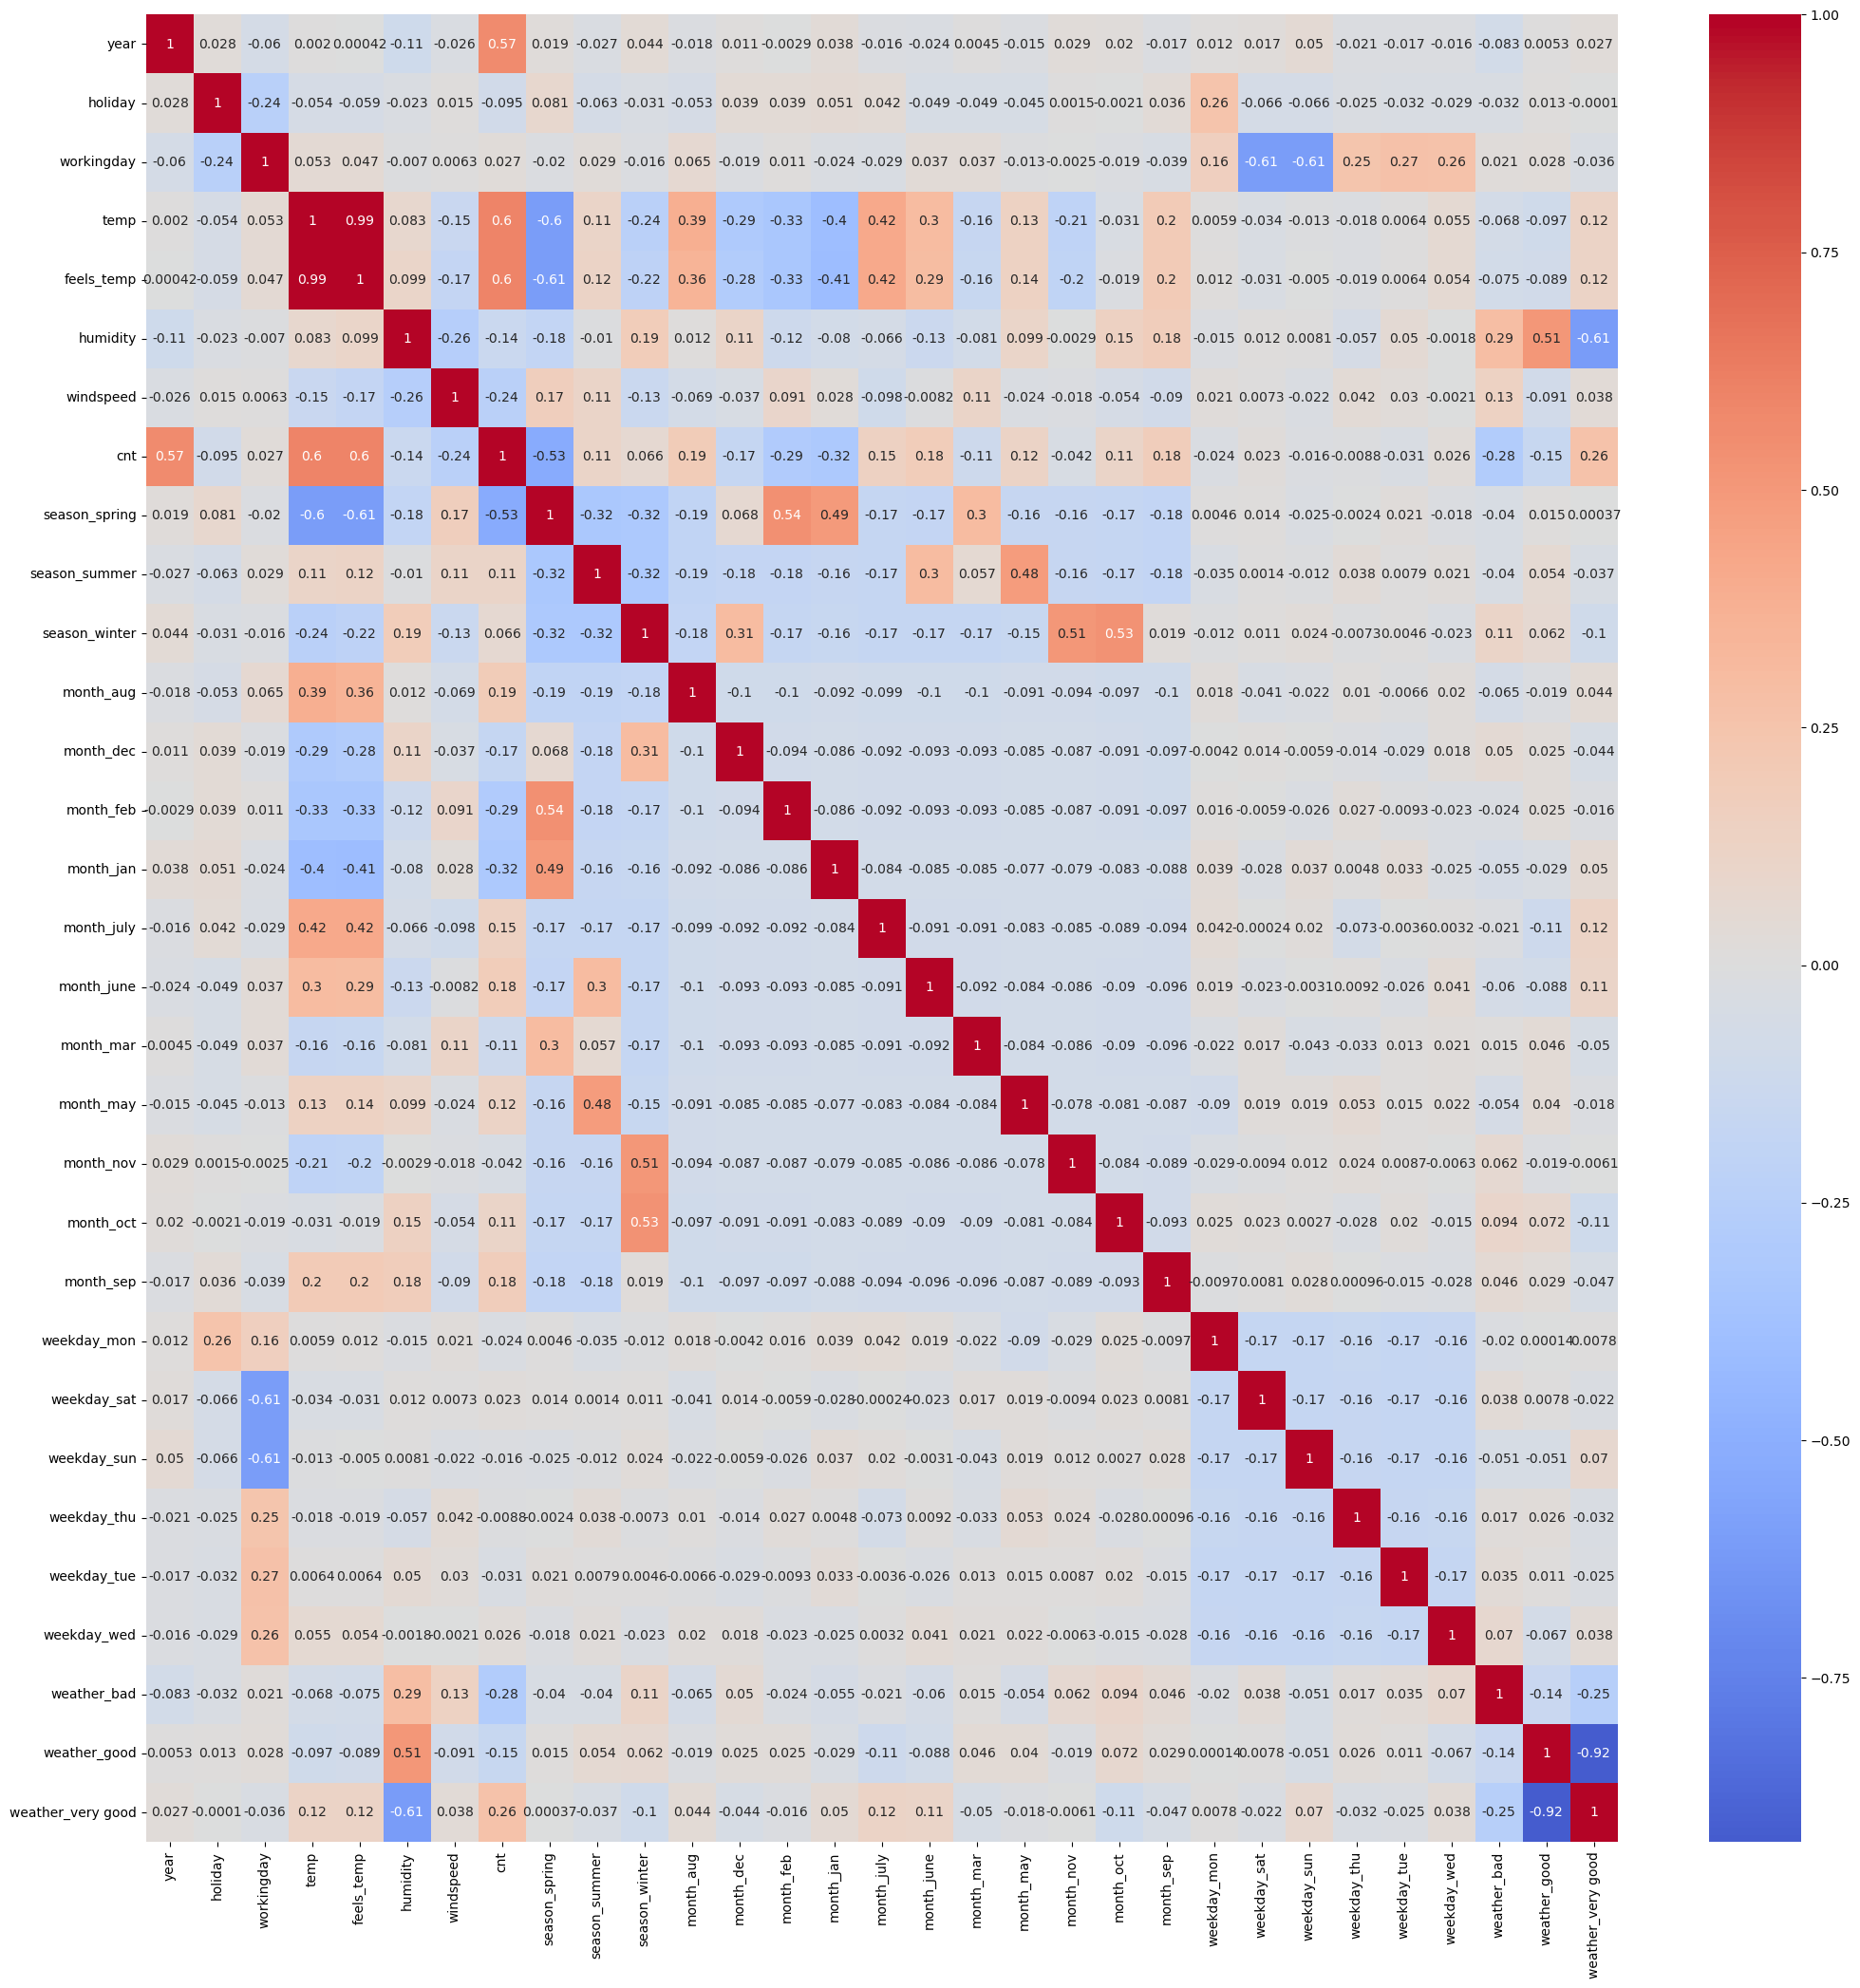

In [73]:
plt.figure(figsize=(25,25))
sns.heatmap(bs_train.corr(), annot=True, cmap="coolwarm", center=0)
plt.show()

# Correlation can be found 
# High season_sprint and cnt
# temp, feels_emp and cnt
# year and cnt
# weather_bad and cnt have a mild negative correlation, which had a significant difference in EDA compared to other

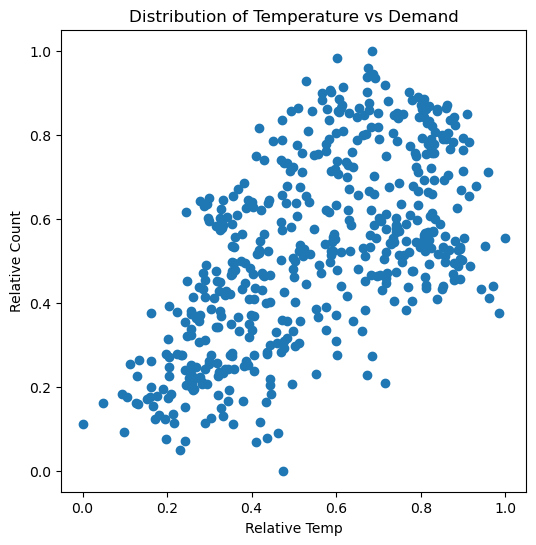

In [74]:
plt.figure(figsize=(6,6))
plt.scatter(bs_train.temp, bs_train.cnt)
plt.title("Distribution of Temperature vs Demand")
plt.xlabel("Relative Temp")
plt.ylabel("Relative Count")
plt.show()

#### 5.3 Model Building

In [76]:
# remove the target variable and keep it for linear model as y_train
y_train = bs_train.pop('cnt')
X_train = bs_train

In [77]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

##### 5.3.1 Feature Selection using RFE

- Fits model lr and recursively remote least important feature
- Provide the required RFE features with ranking

In [79]:
# RFE to select the list of features
rfe = RFE(estimator=lr, n_features_to_select=18).fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('feels_temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('month_aug', False, 10),
 ('month_dec', True, 1),
 ('month_feb', True, 1),
 ('month_jan', True, 1),
 ('month_july', True, 1),
 ('month_june', False, 9),
 ('month_mar', False, 8),
 ('month_may', False, 4),
 ('month_nov', True, 1),
 ('month_oct', False, 7),
 ('month_sep', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 3),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 11),
 ('weather_bad', True, 1),
 ('weather_good', True, 1),
 ('weather_very good', True, 1)]

In [80]:
selected_rfe = X_train.columns[rfe.support_]

In [81]:
X_train = X_train[selected_rfe]

In [82]:
X_train.columns

Index(['year', 'holiday', 'temp', 'feels_temp', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_dec', 'month_feb', 'month_jan',
       'month_july', 'month_nov', 'month_sep', 'weekday_sat', 'weather_bad',
       'weather_good', 'weather_very good'],
      dtype='object')

##### 5.3.2 Feature Selection using VIF

- Provide inflation factor to determine multicollinearity
- Eliminate the features having higher VIF values
- Threshold of VIF > 5 should be considered for removal, VIF > 10 must be removed unless there is business use case recommended to do otherwise

In [84]:
def drop_by_VIF(X, threshold=5):
    vif_df = pd.DataFrame()

    print("=========================================")
    print("ReCalculate VIF")
    print("No of VIF Features " + str(X.shape[1]))
    
    vif_df["Feature" ] = X.columns
    vif_df["VIF"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]

    vif_df = vif_df.sort_values("VIF", ascending=False)
    
    print(vif_df)

    if vif_df["VIF"].max() > threshold:
        remove_feature = vif_df.iloc[0]["Feature"]
        print(f">>> Dropping feature {remove_feature}")

        X.drop(remove_feature, axis=1, inplace=True)
        drop_by_VIF(X) #Call recursively to recalculate VIF on every feature drop

In [85]:
# Drop the columns beyond the VIF > 5 (default)
drop_by_VIF(X_train)

ReCalculate VIF
No of VIF Features 18
              Feature    VIF
2                temp  50.77
3          feels_temp  49.78
17  weather_very good  43.24
16       weather_good  30.72
15        weather_bad   4.99
6       season_spring   3.57
7       season_winter   2.22
10          month_jan   2.17
9           month_feb   2.12
4            humidity   2.11
12          month_nov   1.66
8           month_dec   1.63
11         month_july   1.34
5           windspeed   1.22
13          month_sep   1.14
0                year   1.04
1             holiday   1.03
14        weekday_sat   1.01
>>> Dropping feature temp
ReCalculate VIF
No of VIF Features 17
              Feature    VIF
16  weather_very good  42.97
15       weather_good  30.57
14        weather_bad   4.96
5       season_spring   3.52
2          feels_temp   3.41
9           month_jan   2.17
6       season_winter   2.17
8           month_feb   2.12
3            humidity   2.10
11          month_nov   1.66
7           month_dec   1.63

In [86]:
X_train.columns
# Columns got dropped due to higher VIF Values

Index(['year', 'holiday', 'feels_temp', 'windspeed', 'season_spring',
       'season_winter', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_nov', 'month_sep', 'weekday_sat', 'weather_bad', 'weather_good'],
      dtype='object')

##### 5.3.3 Final LR Model

In [88]:
X_train = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     169.7
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          8.33e-184
Time:                        09:27:11   Log-Likelihood:                 511.58
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     494   BIC:                            -923.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3089      0.026     11.853      0.000       0.258       0.360
year              0.2435      0.008     30.187      0.000       0.228       0.259
holiday          -0.0829      0.026     -3.231      0.001      -0.133      -0.032
feels_temp        0.3669      0.034     10.859      0.000       0.301       0.433
windspeed        -0.1071      0.022     -4.896      0.000      -0.150      -0.064
season_spring    -0.0884      0.017     -5.083      0.000      -0.123      -0.054
season_winter     0.0677      0.014      4.909      0.000       0.041       0.095
month_dec        -0.0903      0.018     -5.037      0.000      -0.126      -0.055
month_feb        -0.0611      0.021     -2.957      0.003      -0.102      -0.021
month_jan        -0.1060      0.023     -4.713      0.000      -0.150      -0.062
month_july       -0.0496      0.017     -2.968      0.003      -0.082      -0.017
month_nov        -0.0835      0.020     -4.267      0.000      -0.122      -0.045
month_sep         0.0401      0.015      2.714      0.007       0.011       0.069
weekday_sat       0.0186      0.011      1.619      0.106      -0.004       0.041
weather_bad      -0.2857      0.022    -13.027      0.000      -0.329      -0.243
weather_good     -0.0837      0.009     -9.661      0.000      -0.101      -0.067
==============================================================================
Omnibus:                       56.471   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.052
Skew:                          -0.589   Prob(JB):                     1.28e-29
Kurtosis:                       5.207   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
lr.pvalues[lr.pvalues>0.05]

weekday_sat    0.106042
dtype: float64

In [90]:
# Dropping PValue

def drop_by_PValue(X_train_lm, y_train, threshold=0.05):
    print("=========================================")
    print("ReCalculate PValues and Refit Model")
    lr = sm.OLS(y_train,X_train_lm).fit()
    high_pvalues = lr.pvalues[lr.pvalues > threshold]
    
    if high_pvalues.empty:
        return lr
    print(f"High PValue features \n{high_pvalues}")
    remove_feature = high_pvalues.idxmax() #index of maximum value result in feature
    
    print(f">>> Dropping feature {remove_feature}")

    X_train_lm.drop(remove_feature, axis=1, inplace=True)
    return drop_by_PValue(X_train_lm, y_train)
    

In [91]:
lr = drop_by_PValue(X_train, y_train)

ReCalculate PValues and Refit Model
High PValue features 
weekday_sat    0.106042
dtype: float64
>>> Dropping feature weekday_sat
ReCalculate PValues and Refit Model


In [92]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.23e-184
Time:                        09:27:12   Log-Likelihood:                 510.23
No. Observations:                 510   AIC:                            -990.5
Df Residuals:                     495   BIC:                            -926.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3131      0.026     12.060      0.000       0.262       0.364
year              0.2438      0.008     30.188      0.000       0.228       0.260
holiday          -0.0858      0.026     -3.344      0.001      -0.136      -0.035
feels_temp        0.3640      0.034     10.770      0.000       0.298       0.430
windspeed        -0.1074      0.022     -4.900      0.000      -0.150      -0.064
season_spring    -0.0875      0.017     -5.024      0.000      -0.122      -0.053
season_winter     0.0678      0.014      4.911      0.000       0.041       0.095
month_dec        -0.0911      0.018     -5.074      0.000      -0.126      -0.056
month_feb        -0.0629      0.021     -3.041      0.002      -0.103      -0.022
month_jan        -0.1085      0.022     -4.827      0.000      -0.153      -0.064
month_july       -0.0487      0.017     -2.913      0.004      -0.082      -0.016
month_nov        -0.0845      0.020     -4.310      0.000      -0.123      -0.046
month_sep         0.0405      0.015      2.740      0.006       0.011       0.070
weather_bad      -0.2847      0.022    -12.964      0.000      -0.328      -0.242
weather_good     -0.0836      0.009     -9.638      0.000      -0.101      -0.067
==============================================================================
Omnibus:                       54.145   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.858
Skew:                          -0.555   Prob(JB):                     2.33e-29
Kurtosis:                       5.230   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
print(f"F-statistic{lr.fvalue:.5f}")
print(f"Prob (F-statistic){lr.f_pvalue:.5f}")

F-statistic181.04487
Prob (F-statistic)0.00000


- P-values of all features are normal and very low multicollinearity 
- F-statistic 164 is greater than 1 is good
- P-value of F-statistics is close to zero, model is significant and it is not by chance


##### 5.3.4 Prediction using Test Datasets

In [96]:
bs_test[num_cols] = mmscaler.fit_transform(bs_test[num_cols])

In [97]:
bs_test.head()

,year,holiday,workingday,temp,feels_temp,humidity,windspeed,cnt,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weather_bad,weather_good,weather_very good
177,0,0,1,0.779422,0.725234,0.618688,0.175637,0.537042,0,0,...,0,1,0,0,0,0,0,0,1,0
661,1,0,1,0.653061,0.619739,0.589645,0.103876,0.911853,0,0,...,0,0,0,0,0,0,1,0,0,1
107,0,0,1,0.553301,0.544846,0.466345,0.291040,0.376444,0,1,...,0,1,0,0,0,0,0,0,0,1
675,1,0,1,0.265108,0.236885,0.472921,0.580773,0.578101,0,0,...,0,0,0,0,0,0,1,0,1,0
9,0,0,1,0.072241,0.070141,0.387982,0.414115,0.111753,1,0,...,0,1,0,0,0,0,0,0,0,1


In [98]:
y_test = bs_test.pop('cnt')

In [99]:
X_test = bs_test
X_test = sm.add_constant(X_test)
X_test = X_test[X_train.columns]

In [100]:
X_test.columns

Index(['const', 'year', 'holiday', 'feels_temp', 'windspeed', 'season_spring',
       'season_winter', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_nov', 'month_sep', 'weather_bad', 'weather_good'],
      dtype='object')

In [101]:
y_test_pred = lr.predict(X_test)

In [102]:
y_train_pred = lr.predict(X_train)

### 6. Model Evaluation

#### 6.1 Error Term Distribution Analysis

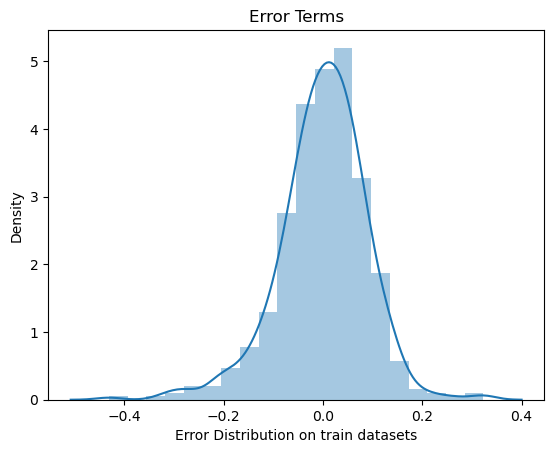

In [105]:
sns.distplot(y_train-y_train_pred, bins=20)
plt.title("Error Terms")
plt.xlabel("Error Distribution on train datasets")
plt.show()

- Error terms are normally distributed

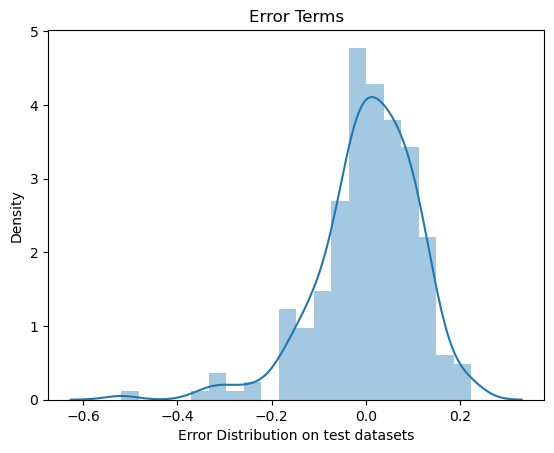

In [107]:
sns.distplot(y_test-y_test_pred, bins=20)
plt.title("Error Terms")
plt.xlabel("Error Distribution on test datasets")
plt.show()

- Error terms are normally distributed

#### 6.2 Residual Analysis

Residual analysis evaluates the differences between observed values (actual data) and predicted values (from a linear regression model). It helps validate the assumptions of a linear regression model.

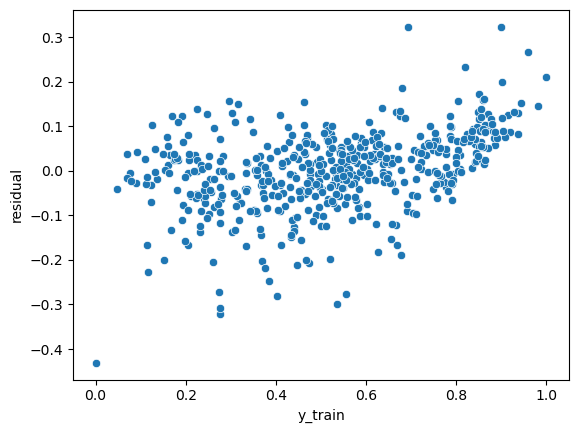

In [110]:
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.xlabel("y_train")
plt.ylabel("residual")
plt.show()

# No visible pattern on the residual and y_train

#### 6.3 R-Square and Adjusted R-Square Analysis

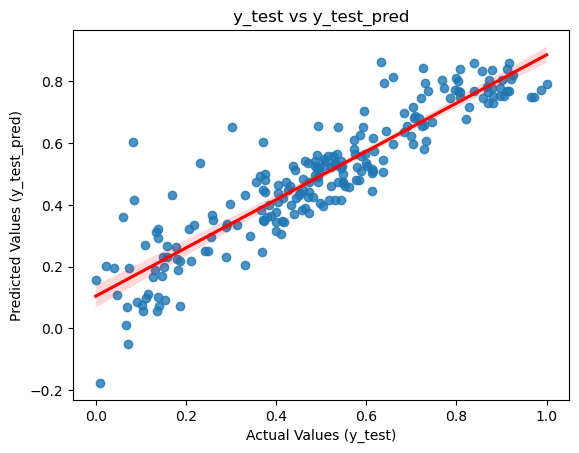

In [112]:
# Acutal vs Predicted
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True, line_kws={"color": "red"})

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_test_pred)")
plt.title("y_test vs y_test_pred")
plt.show()

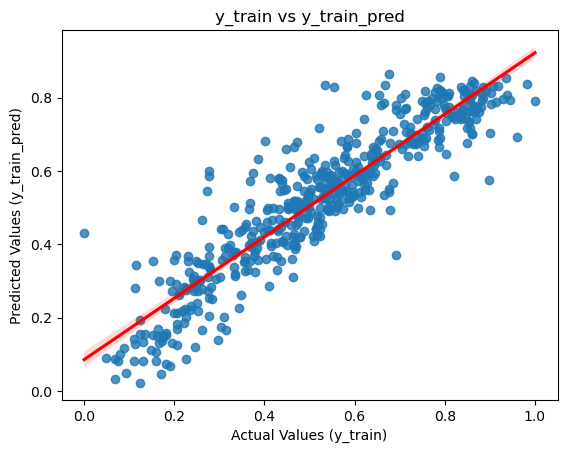

In [113]:
# Acutal vs Predicted
sns.regplot(x=y_train, y=y_train_pred, fit_reg=True, line_kws={"color": "red"})

plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (y_train_pred)")
plt.title("y_train vs y_train_pred")
plt.show()

In [114]:
r2_train = r2_score(y_train, y_train_pred)
round(r2_train,2)

0.84

In [115]:
r2_test = r2_score(y_test, y_test_pred)
round(r2_test,2)

0.82

In [116]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1 - ((1 - r2_train) * (n - 1)) / (n - p - 1)
round(adjusted_r2_train,2)

0.83

In [117]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1 - ((1 - r2_test) * (n - 1)) / (n - p - 1)
round(adjusted_r2_test,2)

0.81

#### 6.4 Model Evaluation Observation
- Error terms are normally distributed
- Residual anaylsis holds good git of the model since there is no pattern found
- The model performing well with training and test data sets with small drop in R-Square value
- The model explains 84% of the variance in the training data, indicating a solid fit to the training set.
- The slight drop in R-squared from 0.84 (train) to 0.82 (test) suggests minimal overfitting and good generalization.
- The Adjusted R-squared values of 0.83 on training data and 0.81 on test data suggest that the model is generalizing well to unseen data.

#### Demand for the Rental bikes can be predicted using model variables 'year', 'weather_bad', 'feels_temp', 'weather_good', 'month_dec', 'season_spring', 'season_winter', 'windspeed', 'month_jan', 'month_nov', 'holiday', 'month_feb', 'month_july', 'month_sep'

In [231]:
# Get coefficients (params) of the model
coefficients = lr.params
p_values = lr.pvalues

# Remove constant (intercept) from coefficients and p-values
coefficients = coefficients.drop('const')
p_values = p_values.drop('const')

# Combine into a single DataFrame for significance rating
significant_features = pd.DataFrame({
    'Coefficient': coefficients,
    'Absolute Coefficient': coefficients.abs(),
    'P-Value': p_values
})

# Sort by P-Value first (more significant features), then by absolute coefficient
significant_features = significant_features.sort_values(by=['P-Value', 'Absolute Coefficient'], ascending=[True, False])

print(significant_features)

               Coefficient  Absolute Coefficient        P-Value
year              0.243833              0.243833  2.580641e-114
weather_bad      -0.284687              0.284687   2.687790e-33
feels_temp        0.363983              0.363983   1.919624e-24
weather_good     -0.083614              0.083614   2.912093e-20
month_dec        -0.091082              0.091082   5.509503e-07
season_spring    -0.087516              0.087516   7.092348e-07
season_winter     0.067822              0.067822   1.232649e-06
windspeed        -0.107378              0.107378   1.300421e-06
month_jan        -0.108549              0.108549   1.845823e-06
month_nov        -0.084484              0.084484   1.972019e-05
holiday          -0.085765              0.085765   8.875200e-04
month_feb        -0.062869              0.062869   2.486045e-03
month_july       -0.048695              0.048695   3.743058e-03
month_sep         0.040522              0.040522   6.368378e-03


In [233]:
# Top 3 Feature of the model
significant_features.index.tolist()[:3]

['year', 'weather_bad', 'feels_temp']